## <font color='blue'>Qualificação Automática de Leads Para Processos de Vendas</font>

## Definição do Problema

Leia o manual em pdf no Capítulo 14 do curso.

## Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.3.3
matplotlib: 3.4.3
sklearn   : 1.0.1



## Carregando os Dados

In [4]:
dados = pd.read_csv("dados/dataset.csv")

In [5]:
dados.shape

(9240, 37)

In [6]:
dados.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
dados.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Limpeza dos Dados

In [9]:
dados.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
for col in dados.columns:
    if dados[col].isnull().sum() > 3000:
        dados.drop(col, axis = 1, inplace = True)

In [11]:
dados.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
dados['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [13]:
dados.drop(['City'], axis = 1, inplace = True)

In [14]:
dados.shape

(9240, 30)

In [15]:
dados['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [16]:
dados.drop(['Country'], axis = 1, inplace = True)

In [17]:
dados.shape

(9240, 29)

In [18]:
dados.isna().sum() / dados.shape[0] * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [19]:
dados['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
dados.drop(['Lead Profile'], axis = 1, inplace = True)

In [21]:
dados['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [22]:
dados.drop(['How did you hear about X Education'], axis = 1, inplace = True)

In [23]:
dados['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
dados['Specialization'] = dados['Specialization'].replace('Select', 'Other')

In [25]:
dados['Specialization'].astype('category').value_counts()

Other                                1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
dados.shape

(9240, 27)

In [27]:
dados.isna().sum() / dados.shape[0] * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [28]:
dados['Newspaper'].astype('category').value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [29]:
dados['Do Not Call'].astype('category').value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [30]:
dados['What matters most to you in choosing a course'].astype('category').value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
for col in dados.columns:
    print(dados[col].astype('category').value_counts())
    print('-------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
-------------------------------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
-------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------

In [32]:
dados.drop(['Do Not Call',
            'Search',
            'Magazine',
            'Newspaper Article',
            'X Education Forums',
            'Newspaper',
            'Digital Advertisement',
            'Through Recommendations',
            'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content',
            'Get updates on DM Content',
            'What matters most to you in choosing a course',
            'I agree to pay the amount through cheque'],
           axis = 1,
           inplace = True)

In [33]:
dados.shape

(9240, 14)

In [34]:
dados.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [35]:
dados = dados[~pd.isnull(dados["What is your current occupation"])]

In [36]:
dados.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [37]:
dados = dados[~pd.isnull(dados["TotalVisits"])]

In [38]:
dados.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [39]:
dados = dados[~pd.isnull(dados["Lead Source"])]

In [40]:
dados = dados[~pd.isnull(dados["Specialization"])]

In [41]:
dados.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [42]:
dados.shape

(6373, 14)

In [43]:
dados.shape[0] / 9240

0.6897186147186147

In [44]:
dados.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
dados.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,No,Modified


In [46]:
dados.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [47]:
dados.shape

(6373, 12)

In [48]:
dados.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,No,Modified


### Ajustando os Tipos de Dados

In [49]:
dados.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [50]:
temp = dados.loc[:,dados.dtypes=='object']

In [51]:
temp.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Last Activity                             object
Specialization                            object
What is your current occupation           object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [52]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
dummy = pd.get_dummies(dados[['Lead Origin', 
                              'Lead Source', 
                              'Do Not Email', 
                              'Last Activity',
                              'Specialization', 
                              'What is your current occupation',
                              'A free copy of Mastering The Interview', 
                              'Last Notable Activity']],
                       drop_first = True)

In [54]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
dados = pd.concat([dados, dummy], axis = 1)

In [56]:
dados.dtypes

Lead Origin                                            object
Lead Source                                            object
Do Not Email                                           object
Converted                                               int64
TotalVisits                                           float64
                                                       ...   
Last Notable Activity_Page Visited on Website           uint8
Last Notable Activity_SMS Sent                          uint8
Last Notable Activity_Unreachable                       uint8
Last Notable Activity_Unsubscribed                      uint8
Last Notable Activity_View in browser link Clicked      uint8
Length: 83, dtype: object

In [57]:
dados = dados.drop(['Lead Origin', 
                    'Lead Source', 
                    'Do Not Email', 
                    'Last Activity',
                    'Specialization', 
                    'What is your current occupation',
                    'A free copy of Mastering The Interview', 
                    'Last Notable Activity'],
                   axis = 1)

In [58]:
dados.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [59]:
dados.dtypes

Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
Lead Origin_Landing Page Submission                     uint8
                                                       ...   
Last Notable Activity_Page Visited on Website           uint8
Last Notable Activity_SMS Sent                          uint8
Last Notable Activity_Unreachable                       uint8
Last Notable Activity_Unsubscribed                      uint8
Last Notable Activity_View in browser link Clicked      uint8
Length: 75, dtype: object

In [60]:
(dados.dtypes=='object').sum()

0

In [61]:
X = dados.drop(['Converted'], axis = 1)

In [62]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
X.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [64]:
y = dados['Converted']

In [65]:
dados['Converted'].value_counts()

0    3308
1    3065
Name: Converted, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
X_train[['TotalVisits', 
         'Total Time Spent on Website', 
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                                                  'Total Time Spent on Website', 
                                                                  'Page Views Per Visit']])

In [70]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9192,0.163636,0.126320,0.054545,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3516,0.090909,0.046655,0.045455,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1888,0.109091,0.135123,0.109091,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
90,0.054545,0.094190,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1327,0.036364,0.031250,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
dados.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.026851,0.005896,0.026100,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.020082,0.005003,0.024632,-0.107230,-0.009837,0.035147,0.082950,0.010331,0.001504,-0.009888
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.048724,0.003003,0.015492,-0.075318,-0.042338,0.017507,0.031327,0.015233,0.028551,0.001096
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.039927,0.010907,-0.002770,-0.062914,-0.085315,0.050847,0.020810,-0.013579,0.024441,-0.014388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Page Visited on Website,-0.032219,0.226728,0.035147,0.017507,0.050847,-0.016433,-0.012129,0.056343,-0.012353,-0.013925,...,-0.127499,-0.002329,-0.008407,-0.123332,-0.020429,1.000000,-0.119786,-0.010944,-0.013001,-0.002329
Last Notable Activity_SMS Sent,0.284301,-0.028923,0.082950,0.031327,0.020810,0.091734,-0.036712,0.002049,-0.032370,-0.024070,...,-0.441685,-0.008070,-0.029124,-0.427251,-0.070769,-0.119786,1.000000,-0.037914,-0.045037,-0.008070
Last Notable Activity_Unreachable,0.050436,0.002792,0.010331,0.015233,-0.013579,0.009242,-0.003839,-0.020353,-0.003910,0.016786,...,-0.040355,-0.000737,-0.002661,-0.039036,-0.006466,-0.010944,-0.037914,1.000000,-0.004115,-0.000737
Last Notable Activity_Unsubscribed,-0.026673,0.001631,0.001504,0.028551,0.024441,-0.022143,-0.004560,0.004402,-0.004644,-0.004646,...,-0.047937,-0.000876,-0.003161,-0.046371,-0.007681,-0.013001,-0.045037,-0.004115,1.000000,-0.000876


In [72]:
logreg = LogisticRegression(solver = 'liblinear')

In [73]:
from sklearn.feature_selection import RFE

In [74]:
rfe = RFE(logreg)

In [75]:
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 29),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 2),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),

In [77]:
col = X_train.columns[rfe.support_]

In [78]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Other',
       'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your curren

In [79]:
X_train = X_train[col]

In [80]:
import statsmodels.api as sm

In [81]:
X_train_sm = sm.add_constant(X_train)

In [82]:
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

In [83]:
res = logm2.fit()

In [84]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.6
Date:                Sat, 06 Nov 2021   Deviance:                       3973.2
Time:                        11:50:02   Pearson chi2:                 4.49e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1368      0.783     -0.175      0.861      -1.672       1.398
TotalVisits                                              3.6493      0.811      4.502      0.000       2.060       5.238
Total Time Spent on Website                              4.3071      0.190     22.651      0.000       3.934       4.680
Page Views Per Visit                                    -4.8247      1.584     -3.046      0.002      -7.929      -1.720
Lead Origin_Landing Page Submission                     -0.7820      0.147     -5.307      0.000      -1.071      -0.493
Lead Origin_Lead Add Form                                0.3903      1.017      0.384      0.701      -1.603       2.384
Lead Source_Direct Traffic                              -0.8319      0.493     -1.689      0.091      -1.798       0.134
Lead Source_Google                                      -0.3395      0.489     -0.694      0.487      -1.298       0.619
Lead Source_Olark Chat                                   0.7650      0.488      1.568      0.117      -0.191       1.721
Lead Source_Organic Search                              -0.5790      0.500     -1.159      0.246      -1.558       0.400
Lead Source_Reference                                    2.0873      0.997      2.094      0.036       0.133       4.041
Lead Source_Referral Sites                              -0.5194      0.602     -0.863      0.388      -1.699       0.660
Lead Source_Social Media                                 1.0199      1.604      0.636      0.525      -2.124       4.164
Lead Source_Welingak Website                             5.2535      1.405      3.740      0.000       2.500       8.007
Do Not Email_Yes                                        -1.0497      0.226     -4.652      0.000      -1.492      -0.607
Last Activity_Converted to Lead                         -0.4637      0.284     -1.634      0.102      -1.020       0.092
Last Activity_Email Bounced                             -1.1249      0.628     -1.792      0.073      -2.355       0.106
Last Activity_Email Opened                               0.6609      0.219      3.019      0.003       0.232       1.090
Last Activity_Had a Phone Conversation                   1.5321      1.018      1.506      0.132      -0.462       3.526
Last Activity_Olark Chat Conversation                   -0.7089      0.261     -2.715      0.007      -1.221      -0.197
Last Activity_SMS Sent                                   0.8742      0.245      3.564      0.000       0.393       1.355
Last Activity_View in browser link Clicked             -21.3450   3.15e+04     -0.001      0.999   -6.17e+04    6.17e+04
Specialization_Business Administration                  -0

In [85]:
res.save("modelo/modelo_final.pickle")

In [86]:
res = res.load("modelo/modelo_final.pickle")

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
28,What is your current occupation_Unemployed,100.0
4,Lead Origin_Lead Add Form,85.0
9,Lead Source_Reference,63.0
6,Lead Source_Google,40.0
5,Lead Source_Direct Traffic,36.0
12,Lead Source_Welingak Website,21.0
8,Lead Source_Organic Search,18.0
7,Lead Source_Olark Chat,17.0
35,Last Notable Activity_SMS Sent,17.0
31,Last Notable Activity_Email Opened,16.0


In [89]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [90]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())

In [91]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.3
Date:                Sat, 06 Nov 2021   Deviance:                       3974.5
Time:                        11:50:13   Pearson chi2:                 4.49e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8021      0.512     -1.566      0.117      -1.806       0.202
TotalVisits                                              3.7015      0.809      4.574      0.000       2.115       5.288
Total Time Spent on Website                              4.3127      0.190     22.684      0.000       3.940       4.685
Page Views Per Visit                                    -4.8268      1.583     -3.050      0.002      -7.929      -1.725
Lead Origin_Landing Page Submission                     -0.7933      0.147     -5.396      0.000      -1.081      -0.505
Lead Origin_Lead Add Form                                0.3853      1.018      0.379      0.705      -1.609       2.380
Lead Source_Direct Traffic                              -0.8267      0.493     -1.678      0.093      -1.792       0.139
Lead Source_Google                                      -0.3396      0.489     -0.695      0.487      -1.298       0.619
Lead Source_Olark Chat                                   0.7692      0.488      1.576      0.115      -0.187       1.726
Lead Source_Organic Search                              -0.5772      0.500     -1.155      0.248      -1.557       0.402
Lead Source_Reference                                    2.0916      0.997      2.097      0.036       0.137       4.046
Lead Source_Referral Sites                              -0.5239      0.602     -0.870      0.384      -1.703       0.656
Lead Source_Social Media                                 1.0086      1.606      0.628      0.530      -2.139       4.156
Lead Source_Welingak Website                             5.2626      1.405      3.746      0.000       2.509       8.016
Do Not Email_Yes                                        -1.0445      0.226     -4.629      0.000      -1.487      -0.602
Last Activity_Converted to Lead                         -0.4715      0.284     -1.662      0.097      -1.028       0.085
Last Activity_Email Bounced                             -1.1360      0.628     -1.809      0.070      -2.366       0.094
Last Activity_Email Opened                               0.6534      0.219      2.987      0.003       0.225       1.082
Last Activity_Had a Phone Conversation                   1.5231      1.018      1.497      0.134      -0.471       3.517
Last Activity_Olark Chat Conversation                   -0.7069      0.261     -2.709      0.007      -1.218      -0.196
Last Activity_SMS Sent                                   0.8673      0.245      3.538      0.000       0.387       1.348
Last Activity_View in browser link Clicked             -21.3588   3.14e+04     -0.001      0.999   -6.17e+04    6.16e+04
Specialization_Business Administration                  -0

In [92]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [93]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
33,Last Notable Activity_SMS Sent,17.0
29,Last Notable Activity_Email Opened,16.0
18,Last Activity_SMS Sent,13.0
15,Last Activity_Email Opened,12.0
5,Lead Source_Google,11.0
4,Lead Source_Direct Traffic,10.0
31,Last Notable Activity_Modified,10.0
3,Lead Origin_Landing Page Submission,7.0
7,Lead Source_Organic Search,6.0
2,Page Views Per Visit,5.0


In [94]:
y_train_pred = res.predict(X_train_sm)

In [95]:
y_train_pred[:10]

9192    0.175433
3516    0.415346
1888    0.256991
90      0.073561
1327    0.582389
6942    0.096246
6461    0.955970
7753    0.827539
8193    0.894894
5653    0.423036
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.17543339, 0.41534594, 0.25699089, 0.07356145, 0.58238944,
       0.09624594, 0.95597019, 0.8275392 , 0.89489382, 0.42303603])

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                   'Conversion_prob':y_train_pred})

In [99]:
y_train_pred_final.head(10)

,Converted,Conversion_prob
0,1,0.175433
1,0,0.415346
2,0,0.256991
3,0,0.073561
4,1,0.582389
5,0,0.096246
6,1,0.955970
7,1,0.827539
8,0,0.894894
9,1,0.423036


In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

In [101]:
y_train_pred_final.head(10)

,Converted,Conversion_prob,predicted
0,1,0.175433,0
1,0,0.415346,0
2,0,0.256991,0
3,0,0.073561,0
4,1,0.582389,1
5,0,0.096246,0
6,1,0.955970,1
7,1,0.827539,1
8,0,0.894894,1
9,1,0.423036,0


In [102]:
from sklearn import metrics

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [104]:
confusion

array([[1933,  383],
       [ 514, 1631]])

In [105]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7989240080699395

In [106]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [107]:
# Sensitivity
TP / (TP+FN)

0.7603729603729604

In [108]:
# Specificity
TN / (TN+FP)

0.8346286701208981

In [109]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,Label='Curva ROC (area=%0.2F)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc='lower right')
    plt.show()
    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

No handles with labels found to put in legend.


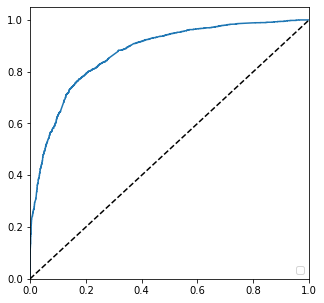

In [111]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

In [112]:
numbers = [float(i)/10 for i in range(10)]

In [113]:
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)

In [114]:
y_train_pred_final.head(10)

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.175433,0,1,1,0,0,0,0,0,0,0,0
1,0,0.415346,0,1,1,1,1,1,0,0,0,0,0
2,0,0.256991,0,1,1,1,0,0,0,0,0,0,0
3,0,0.073561,0,1,0,0,0,0,0,0,0,0,0
4,1,0.582389,1,1,1,1,1,1,1,0,0,0,0
5,0,0.096246,0,1,0,0,0,0,0,0,0,0,0
6,1,0.955970,1,1,1,1,1,1,1,1,1,1,1
7,1,0.827539,1,1,1,1,1,1,1,1,1,1,0
8,0,0.894894,1,1,1,1,1,1,1,1,1,1,0
9,1,0.423036,0,1,1,1,1,1,0,0,0,0,0


In [115]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])

In [116]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [117]:
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = (cm1[0,0])/(cm1[0,0]+cm1[0,1])
    sensitivity = (cm1[1,1])/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy, sensitivity, specificity]

In [118]:
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.480834,1.000000,0.000000
0.1,0.1,0.608384,0.985548,0.259067
0.2,0.2,0.711724,0.947319,0.493523
0.3,0.3,0.766420,0.899767,0.642919
0.4,0.4,0.788837,0.813986,0.765544
0.5,0.5,0.798924,0.760373,0.834629
0.6,0.6,0.784802,0.682984,0.879102
0.7,0.7,0.755660,0.578089,0.920121
0.8,0.8,0.724950,0.480186,0.951641
0.9,0.9,0.648958,0.287179,0.984024


<AxesSubplot:xlabel='prob'>

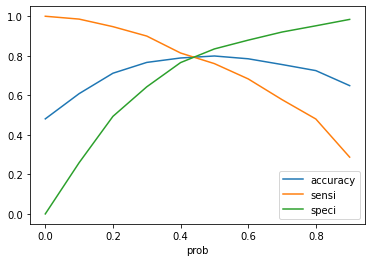

In [119]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])

In [120]:
res.save("modelo/modelo_final.pickle")

# Fim